# **Melbourne Housing Dataset EDA**
The objective of this assignment is to conduct an exploratory data analysis (EDA) and apply feature engineering techniques to enhance the predictive modeling capabilities using the Melbourne Housing dataset. This also helps to have a better understanding on which features affect the housing prices in the real estate market in Melbourne.

## Data Loading and Initial Exploration:
1. Download dataset from https://www.kaggle.com/datasets/ronikmalhotra/melbourne-housing-dataset/data
2. Load the data to the notebook and explore the rows and columns

In [1]:
# Import libraries
import numpy as np # numerical python
import pandas as pd # data analysis
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
 # to plot here itself
%matplotlib inline

In [2]:
# Read the data
df=pd.read_csv(r'C:\Users\Owner\Downloads\Melbourne_housing.csv',dtype={'BuildingArea': 'str'})

#View few records of the data - by default takes first 5 records
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [3]:
# Display total number of rows and columns
df.shape

(34857, 22)

Observation: Number of rows is 34857 and number of columns is 22

In [4]:
# Display the columns present 
print(df.columns)

# Understanding basic information on the dataset columns and its values
df.info()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car  

Whenever object datatype is present it can be a categorical, numerical or string variable. When going through the above information, many categorical and numeric datatypes are represented as objects. So we can proceed to convert them to data type 'category'.

### Numeric Data Types
The various numeric data features are as listed below. The target variable 'Price' is considered to be predicted using the different datatypes.

In [5]:
# Identify numeric columns
df.select_dtypes(['number']).columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount',
       'Price'],
      dtype='object')

In [6]:
df['BuildingArea'] = df['BuildingArea'].replace(['inf', 'missing'], np.nan)

In [7]:
# Convert object to numeric type
df['BuildingArea'] = pd.to_numeric(df['BuildingArea'])

### Categorical Data Types

We know object datatype 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'ParkingArea' and also integer datatype 'Postcode' also comes under Categorical Datatypes.

In [8]:
# Identify object columns
df.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname', 'ParkingArea'],
      dtype='object')

In [9]:
# Convert general object datatype to categorical variables
category_obj = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','ParkingArea']

for colname in category_obj:
    df[colname] = df[colname].astype('category') 

In [10]:
# Convert object Date variable to datetime type
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%Y")

In [11]:
# Convert numeric to categorical variables 
category_num = ['Postcode']  

for colname in category_num:
    df[colname] = df[colname].astype('category')   

In [12]:
# Drop unused columns
df = df.drop(['Latitude','Longtitude'],axis=1)

### Missing Data in Dataset

Analyzing and addressing missing data is an essential step in the data preprocessing phase for several reasons. When data is missing, it often signals potential issues with the quality of the data. Analyzing the presence of missing values helps to identify potential data entry errors, inconsistencies, or issues with data collection processes. Also, missing data can have a significant impact on the results of data analyses. Ignoring missing values or handling them improperly can lead to biased or inaccurate conclusions,thus leading to unreliable insights. Depending on the nature and pattern of missing data, different imputation strategies may be applied.

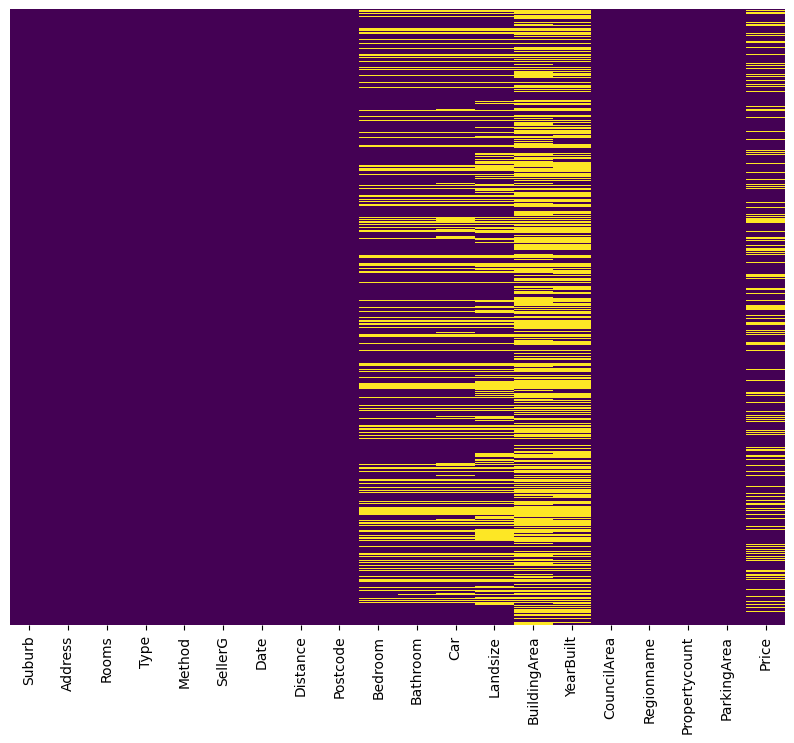

In [13]:
# Visualize missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [14]:
# Count of missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [15]:
# Identify columns containing missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Distance',
 'Postcode',
 'Bedroom',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Propertycount',
 'Price']

In [16]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom          23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Regionname        0.000000
Propertycount     0.008607
ParkingArea       0.000000
Price            21.832057
dtype: float64

As percentages of features Distance, Postcode, CouncilArea, Regionname and Propertycount are very small we can drop the null values as its impact to the analysis will be considerably low. 

In [17]:
df.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'], inplace=True)

After dropping the missing values for few features; Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt and Price are still having null values with we further need to handle properly. 
1) For Bedroom, we can compare it to the Room feature and if the values are almost same, they are closely related. So, we can proceed to fill the null values same as that of corresponding Rooms
2) For Landsize, we can relate it to Suburbs. We need to analyse mean for each unique Suburb and need to fill the null values with corresponding Suburb mean value.
3) For YearBuilt, we can relate to both suburb and the seller as well. We can take the approach that a particular seller might be involved in a suburb for a period of time. 
4) For Price, we can check the outliners and remove the extreme cases out
5) For Car, we can proceed with a common approach where null values can be replaced by the mode
6) For BuildingArea also, we can relate it to Suburbs. We need to analyse mean for each unique Suburb and fill the null values with corresponding Suburb mean value. We can also remove instances where BuildingArea value is 0 as it is not feasible for a residential property to have a size of zero.

### Target Variable and its Distribution - Price

In [18]:
# Statistical Summary of Price Variable
df['Price'].describe()

count    2.724400e+04
mean     1.050210e+06
std      6.414923e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

Price
1100000.0    235
600000.0     235
650000.0     219
800000.0     217
1300000.0    210
            ... 
2161000.0      1
3970000.0      1
1789000.0      1
949500.0       1
780500.0       1
Name: count, Length: 2871, dtype: int64


C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


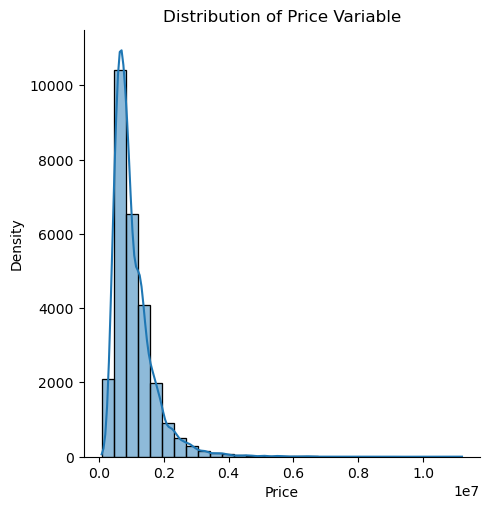

In [19]:
# Distribution of Target Variable, Price
print(df.Price.value_counts())

sns.displot(data=df, x='Price', bins=30, kde=True)
plt.title('Distribution of Price Variable')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [20]:
# Skewness
df['Price'].skew()

2.588796636274247

The above plot shows that Price variable is positively skewed distribution as the string of data points away from the median is more on the right side. Also, as mean is greater than the median we can conclude the distribution as positively skewed, indicating that the majority of houses have lower prices, while a small proportion has much higher prices. The presence of outliers, as suggested by the large standard deviation and the right-skewed nature, needs to considered for further analyses. Depending on the objectives of the analysis, addressing outliers or transforming the variable might be necessary for more robust modeling or statistical inference.

### Summary statistics and data types of the features

In [21]:
#Summary Statistics of features
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Rooms,34854.0,3.031072,1.0,2.0,3.0,4.0,16.0,0.969943
Date,34854,2017-05-23 10:42:59.307970304,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,34854.0,11.185204,0.0,6.4,10.3,14.0,48.1,6.788983
Bedroom,26640.0,3.084647,0.0,2.0,3.0,4.0,30.0,0.98069
Bathroom,26631.0,1.624798,0.0,1.0,2.0,2.0,12.0,0.724212
Car,26129.0,1.728845,0.0,1.0,2.0,2.0,26.0,1.010771
Landsize,23047.0,593.598993,0.0,224.0,521.0,670.0,433014.0,3398.841946
BuildingArea,13742.0,160.2564,0.0,102.0,136.0,188.0,44515.0,401.26706
YearBuilt,15551.0,1965.289885,1196.0,1940.0,1970.0,2000.0,2106.0,37.328178
Propertycount,34854.0,7572.888306,83.0,4385.0,6763.0,10412.0,21650.0,4428.090313


In [22]:
# Data Type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34854 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34854 non-null  category      
 1   Address        34854 non-null  category      
 2   Rooms          34854 non-null  int64         
 3   Type           34854 non-null  category      
 4   Method         34854 non-null  category      
 5   SellerG        34854 non-null  category      
 6   Date           34854 non-null  datetime64[ns]
 7   Distance       34854 non-null  float64       
 8   Postcode       34854 non-null  category      
 9   Bedroom        26640 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    34854 non

We have now converted the variables to categorical, numeric and datetime types which is easier for further analysis.

### Distribution of Numeric variables

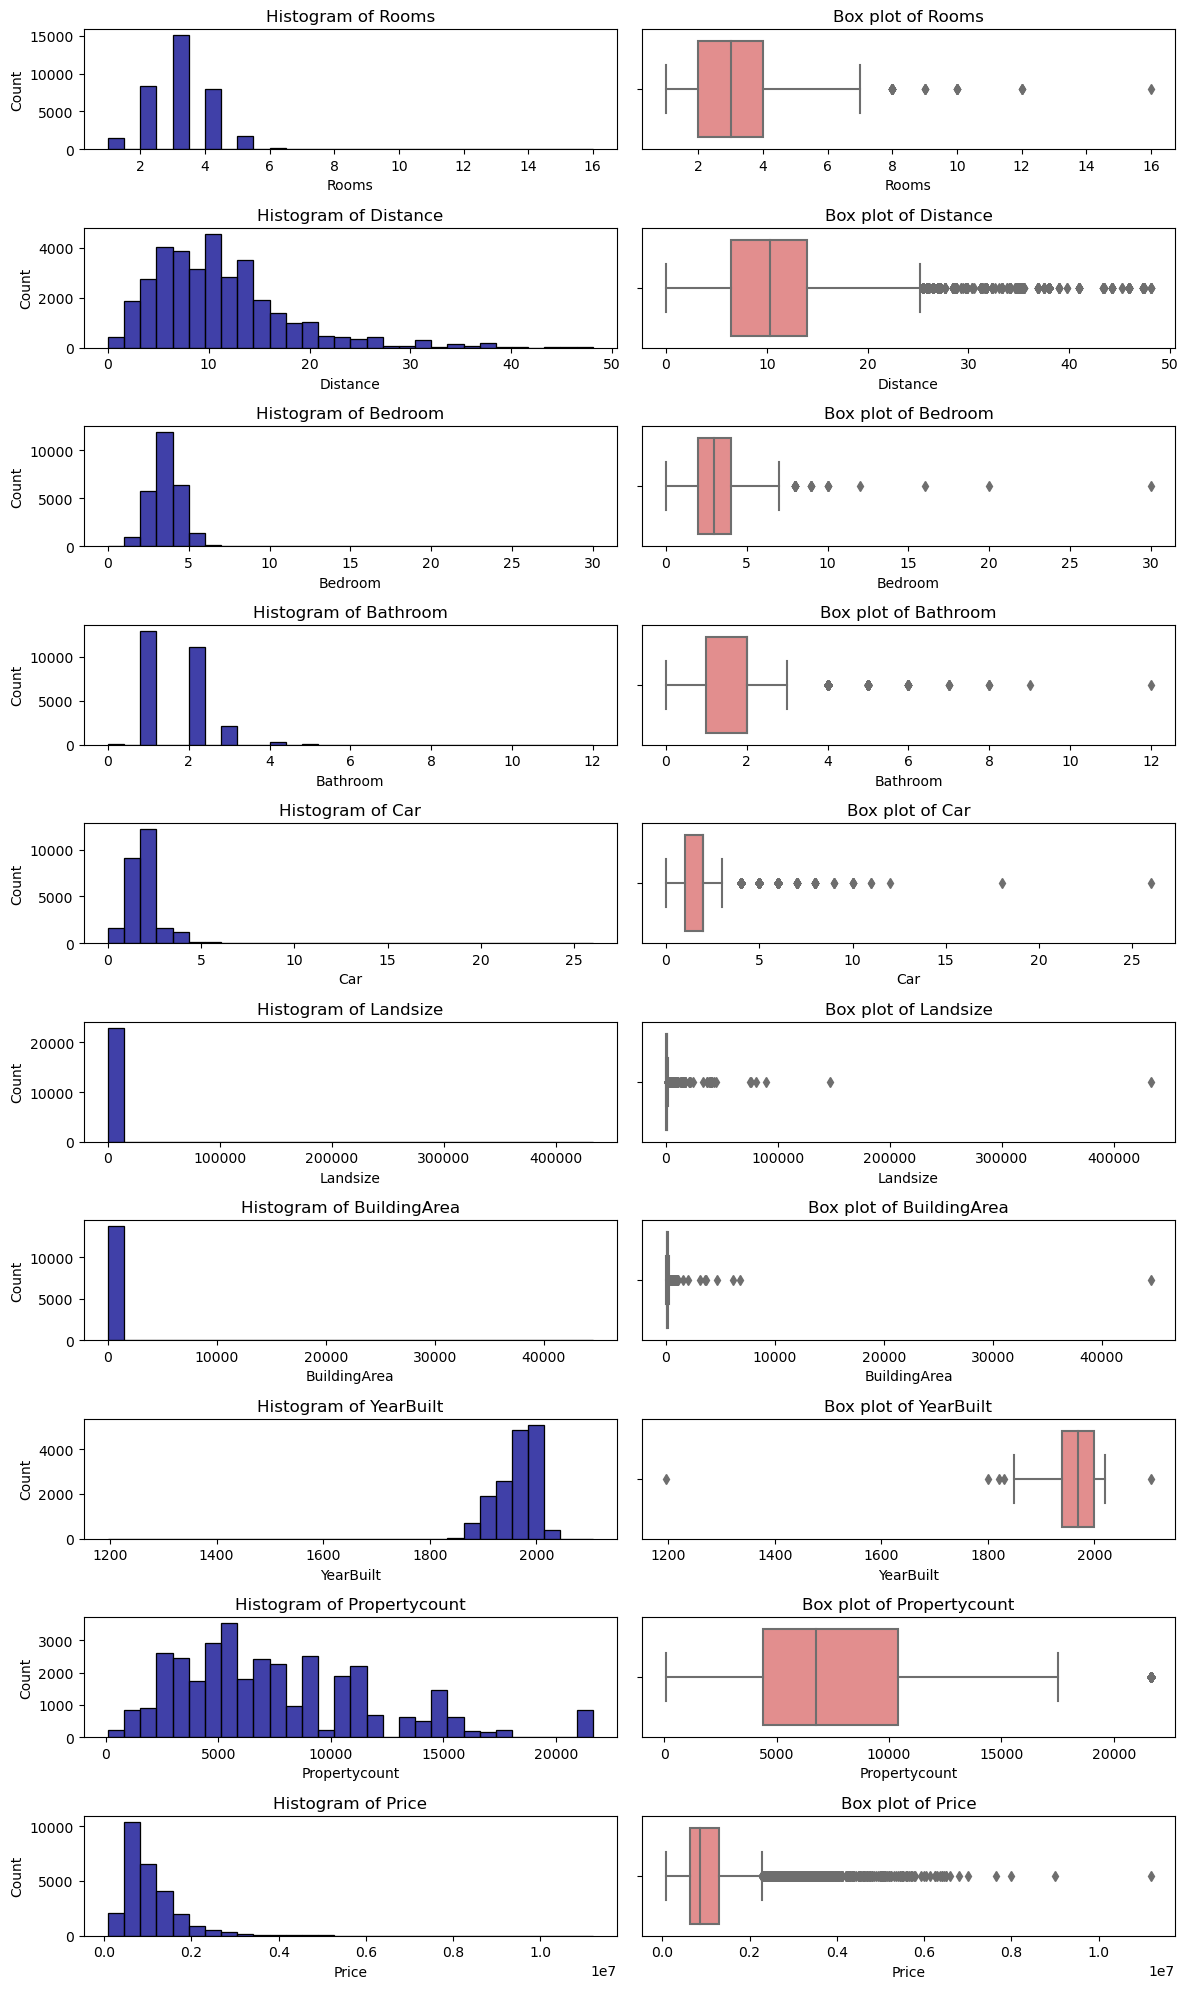

In [23]:
# Select numeric columns from the Dataset
numeric_columns = df.select_dtypes(['number']).columns

# Set up the subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 2 * len(numeric_columns)))

# Plot histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(df[column], bins=30, ax=axes[i, 0], color='darkblue')
    axes[i, 0].set_title(f'Histogram of {column}')

    # Box plot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

When going through the detailed distribution of the numeric variables, the inferences we come across are as given:
1) Rooms: The distribution of the number of rooms in the histogram shows that a significant portion of the dataset has 2 to 4 rooms. There are a few outliers with 12 rooms. The majority of data falls within the interquartile range (IQR), and there are a few outliers on the higher end.
2) Distance: Assuming that Distance variable in the dataset represents distance of each property from a city center or a central point, the distribution of distances reveals that a large number of properties are within 10 kilometers from the city center. There are some properties located farther away, with a maximum distance of 48.1 kilometers. Box plot indicates that most properties are within the IQR, with some outliers on the higher end.
3) Bedrooms: Majority of properties have 2 to 4 bedrooms, with a few outliers having more. The box plot indicates there are a few outliers with a larger number of bedrooms.
4) Bathroom: The histogram suggests that many properties have 1 to 2 bathrooms, with a small number having more whereas the box plot indicates the spread of bathroom counts, with some outliers having more.
5) Car: Most properties have 1 to 2 car spaces, with some outliers having more and the box plot also indicates that most properties have 1 to 2 car spaces, with some outliers having more.
6) Landsize: The distribution of land sizes shows that a significant number of properties have land sizes between 224 and 670 square meters. There are some properties with much larger land sizes, indicating potential outliers and box plot reveals the presence of these outliers with larger land sizes. Minimum value of landsize is 0, however we may not consider it as an outliner as these may be properties where the structure extends up to or very close to the property boundary.
7) BuildingArea: Distribution of building areas shows that most properties have areas between 102 and 188 square meters. There are potential outliers with much larger building areas and box plot indicates the presence of outliers with larger building areas.
8) YearBuilt: Distribution of the years in which properties were built shows a concentration around the 1960s to 2000s, with a peak around 1970. The majority of the data falls within the IQR, with a few outliers on the higher end.
9) Propertycount: Distribution of property counts in the surrounding area suggests a range of counts, with a concentration between 4380 and 10412 and majority of the data falls within the IQR, with a few outliers on the higher end.
10) Price: The distribution of property prices shows a right-skewed distribution, with a concentration around $640,000 to $1,285,000. The box plot indicates the presence of outliers with higher prices.


### Relationship between features and target variable Price

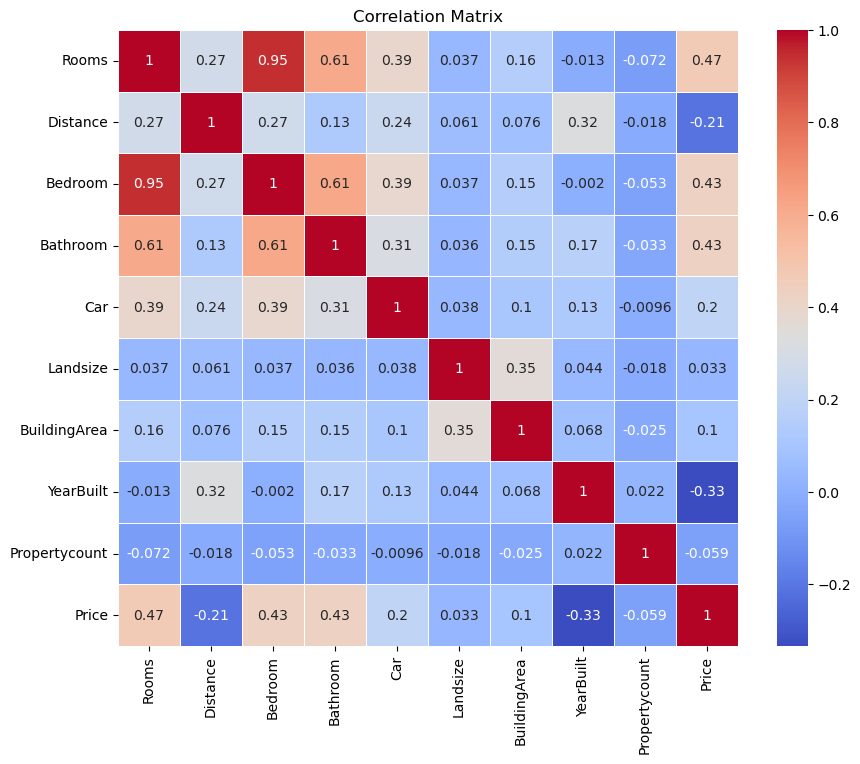

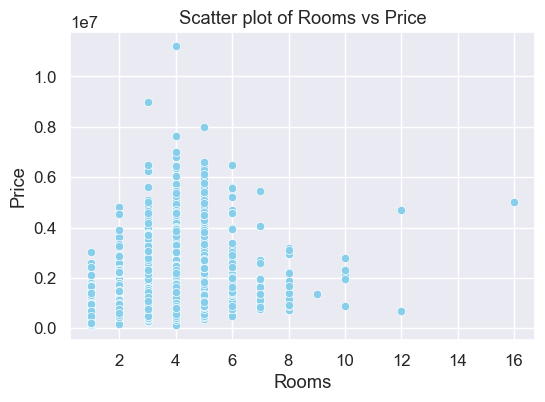

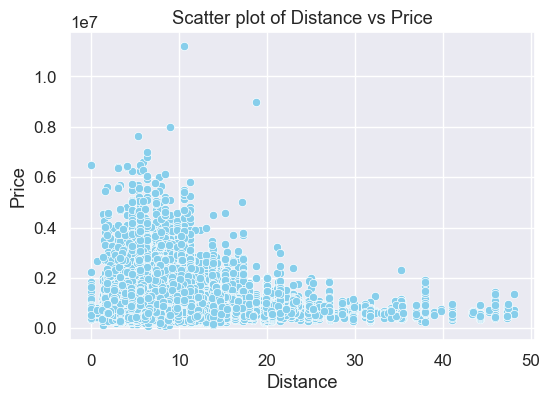

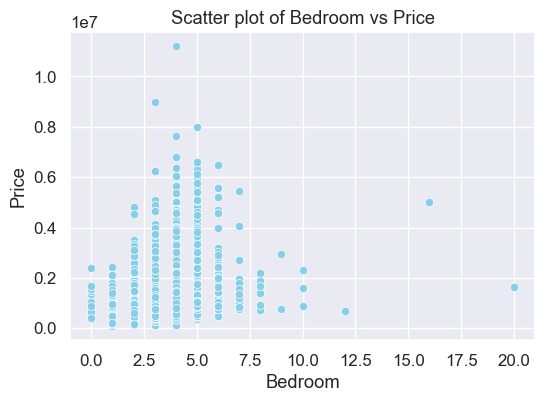

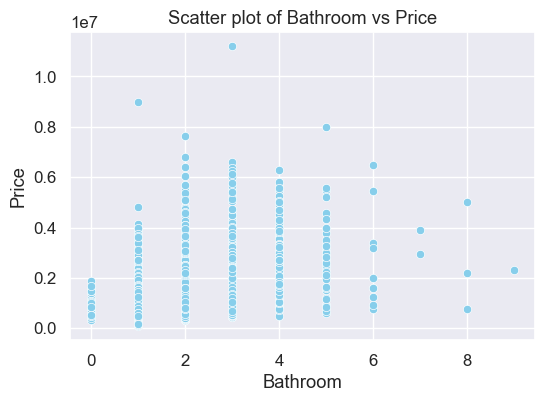

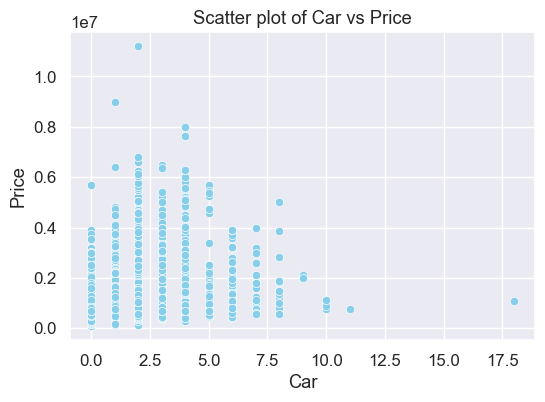

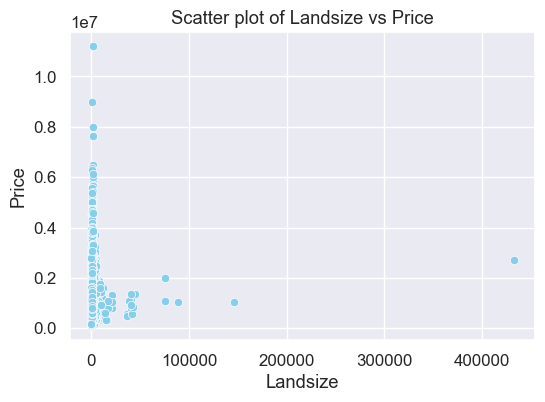

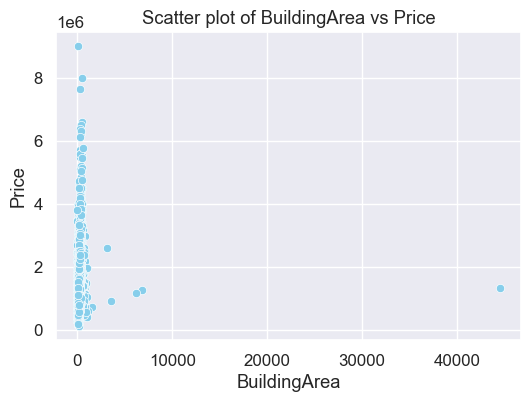

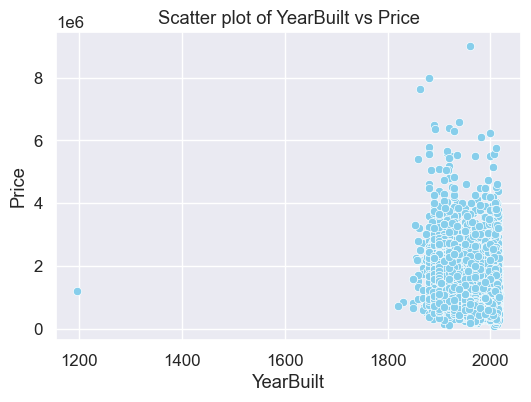

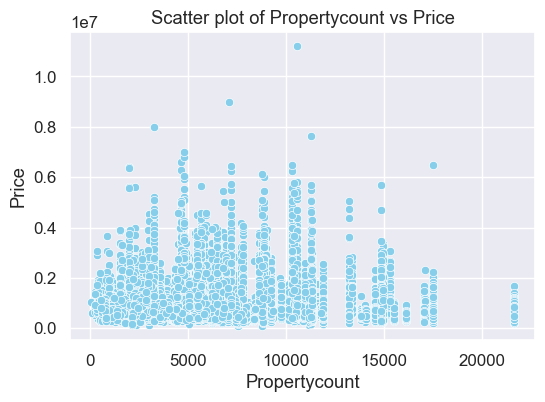

In [24]:
# Selecting numeric features for analysis
numeric_columns = df.select_dtypes(['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for the features against Price
for column in numeric_columns[:-1]: 
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.1)
    sns.scatterplot(x=df[column], y=df['Price'], color='skyblue')
    plt.title(f'Scatter plot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In terms of positive correlation with price; Rooms, Bedrooms and Bathroom can be considered. Rooms, Bedroom, Bathroom features are also positively correlated with one another as they are all measures of home size. 

1) Rooms vs. Price: A scatter plot of the number of rooms against the property price shows a positive correlation. Properties with more rooms could potentially have higher prices.
2) Distance vs. Price: A scatter plot of the distance from the city center against the property price reveals a negative correlation. Properties closer to the city center might have higher prices.
3) Bedroom vs. Price: A scatter plot of the number of bedrooms against the property price shows a positive correlation. Properties with more bedrooms could have higher prices.
4) Bathroom vs. Price: A scatter plot of the number of bathrooms against the property price indicates a positive correlation. Properties with more bathrooms might command higher prices.
5) Car vs. Price: A scatter plot of the number of car spaces against the property price may show a positive correlation. Properties with more car spaces might have higher prices.
6) Landsize vs. Price: A scatter plot of the land size against the property price could show a positive correlation. Larger land sizes might be associated with higher prices.
7) BuildingArea vs. Price: A scatter plot of the building area against the property price indicates a positive correlation. Larger building areas might be associated with higher prices.
8) YearBuilt vs. Price: A scatter plot of the year the property was built against the property price does not show a strong linear correlation. However, certain trends or patterns could be observed.
9) Propertycount vs. Price: A scatter plot of the property count in the neighborhood against the property price does not show a clear correlation. The relationship could be influenced by other factors.

### Distribution of Categorical variables 

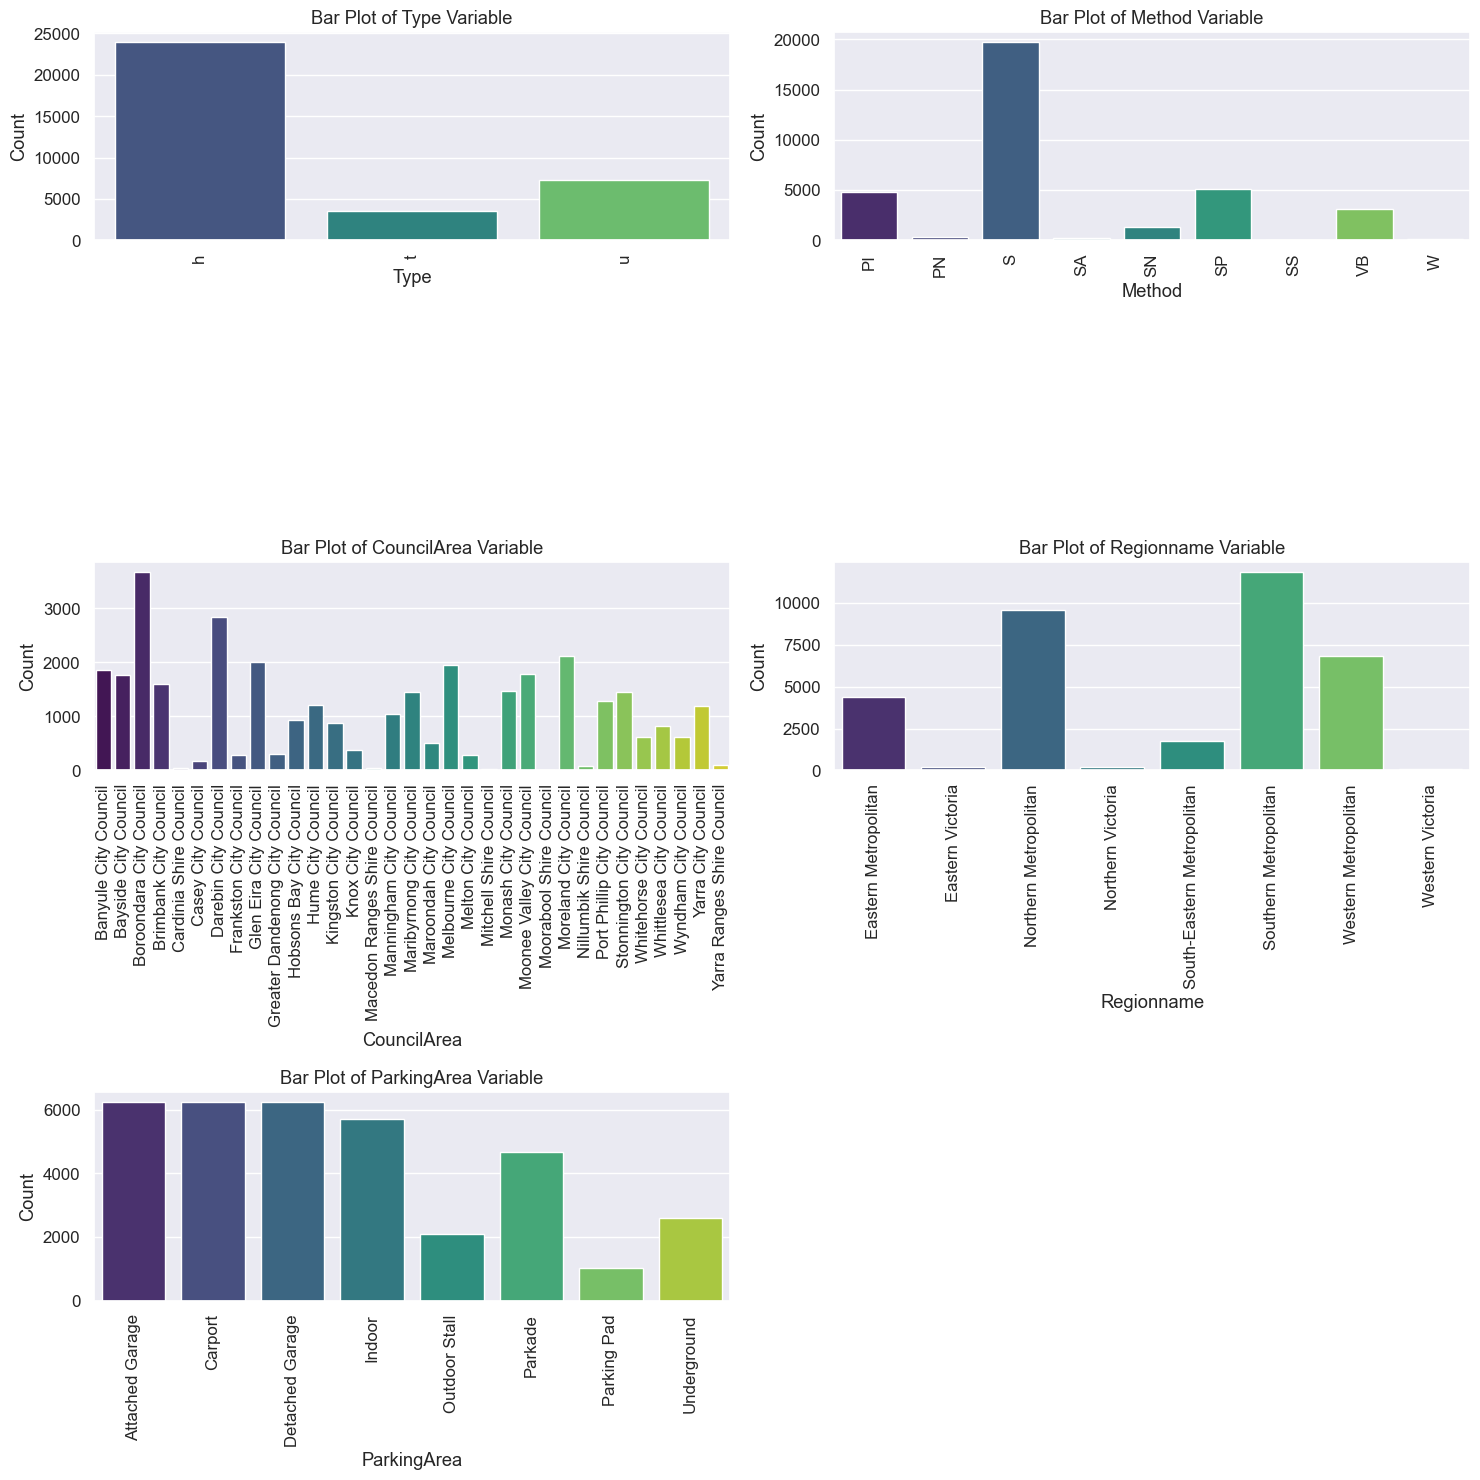

In [26]:
# Select categorical columns
#category_columns = df.select_dtypes(['category']).columns
category_columns = ['Type', 'Method', 'CouncilArea','Regionname', 'ParkingArea']

# Create subplots
sns.set_style('darkgrid')
f, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over categorical columns
for i, col in enumerate(category_columns):
    # Plot on the current axis
    plot=sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
    
    # Rotate x-axis labels to be vertically aligned
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    
    # Set labels and title
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Bar Plot of {col} Variable')
    
# Remove any extra empty subplots
num_plots = len(category_columns)
for j in range(num_plots, len(axes)):
    f.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Categories Address and SellerG can be ignored as they are mostly unique values and can hardly be categorized. Not much inference is obtained when plotting them. Also from suburb barplot we are not able to recognise much info.
The type of property houses are maximum. 
Major property are sold.
Boroondara City Council has maximum houses.
Southern Metropolitan region has maximum houses.


In [ ]:
# Frequency Table
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Displays value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

### Identify Potential Outliers

In [ ]:
numeric_columns = ['Distance', 'Price', 'BuildingArea', 'Landsize','Propertycount']
lower_bounds = []
upper_bounds = []

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    # Identify outliers for each column
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Optionally, you can create a new column to mark outliers
    df.loc[:, f'{col}_outlier'] = outliers
    outlier_count = df[df[f'{col}_outlier'] == True][f'{col}_outlier'].count()
    print(f"Column: {col}_outlier, Outlier Count: {outlier_count}")

# Store lower and upper bounds for reference
bounds_df = pd.DataFrame({'Column': numeric_columns, 'Lower Bound': lower_bounds, 'Upper Bound': upper_bounds})


Outliers are those data points that deviate significantly from the majority and can wield substantial influence over the outcomes of statistical analyses. In our dataset, after thorough examination, the given above are the potential outliers for 'Distance', 'Price', 'BuildingArea', 'Landsize' and 'Propertycount' features with need to be resolved for proper analysis.

In [ ]:
df=df.drop(['Distance_outlier', 'Price_outlier', 'BuildingArea_outlier', 
            'Landsize_outlier', 'Propertycount_outlier'],axis=1)

### Handling Missing Data
Handling missing data is a critical aspect of data preprocessing, and **mean imputation** serves as a straightforward and widely-used technique for addressing missing values in numeric variables. This method is based on the assumption that missing values in a variable are missing at random and are, therefore, best approximated by the mean of the observed values.

In [ ]:
# Filling Bedrooms
df['Rooms v Bedroom'] = df['Rooms'] - df['Bedroom'] 
df['Bedroom'].fillna(df['Rooms'], inplace=True)
df=df.drop(['Rooms v Bedroom'],axis=1)

In [ ]:
# Filling BuildingArea
BuildingArea_Mean={}
for name in df['Suburb'].unique():
    BuildingArea_Mean.update({name: df[df['Suburb']==name]['BuildingArea'].mean()})

for index, row in df.iterrows():
    if pd.isnull(row['BuildingArea']):
        suburb = row['Suburb']
        df.at[index, 'BuildingArea'] = BuildingArea_Mean.get(suburb, row['BuildingArea'])


In [ ]:
# Getting Landsize mean of each suburb
Landsize_Mean={}
for name in df['Suburb'].unique():
    Landsize_Mean.update({name: df[df['Suburb']==name]['Landsize'].mean()})

# Filling Landsize
for index, row in df.iterrows():
    if pd.isnull(row['Landsize']):
        suburb = row['Suburb']
        df.at[index, 'Landsize'] = Landsize_Mean.get(suburb, row['Landsize'])

In [ ]:
# Getting YearBuilt mean of each seller and suburb
YearBuilt_Mean={}

for seller, suburb in df[['SellerG', 'Suburb']].drop_duplicates().itertuples(index=False):
    seller_suburb_data = df[(df['SellerG'] == seller) & (df['Suburb'] == suburb)]
    mean_year_built = seller_suburb_data['YearBuilt'].mean()
    YearBuilt_Mean[(seller, suburb)] = mean_year_built

# Filling YearBuilt
for index, row in df.iterrows():
    if pd.isnull(row['YearBuilt']):
        seller_suburb_key = (row['SellerG'], row['Suburb'])
        df.at[index, 'YearBuilt'] = YearBuilt_Mean.get(seller_suburb_key, row['YearBuilt'])

We can apply mean imputation to handle null values in BuildingArea, Landsize and YearBuilt features. This will thus reduce the exceptions and help to reduce the skewness to predict Price variable better.

For BuildingArea and Landsize, we are getting the mean of buildingarea corresponding to unique suburb value as they is a logical correlation between them.
For YearBuilt, we can consider both suburb and the seller as well. We can take the approach that a particular seller might be involved in a suburb for a period of time. The mean of yearbuilt for this case can be taken to fill the corresponding null values in YearBuilt feature. We are not considering seller alone as the construction is on different suburbs and the time period may then depend on other factors as well.

### Label Encoding

In [ ]:
# Add age variable
df['Age'] = datetime.date.today().year - df['YearBuilt']

# Identify historic homes
df['BuildingEra'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Convert to Category
df['BuildingEra'] = df['BuildingEra'].astype('category')

Label encoding is used to convert data into smaller categories to easily analyse the variable. Here, we have created new features Age and BuildingEra where Age is basically the age of the building from present year and BuildingEra categories it further as Historic and Contemporary buildings.

In [ ]:
# Encode Type categories
df['Type'] = df['Type'].map({'h':'House','t':'Townhouse', 'u':'Unit/Apartment'})

Type variable in dataset basically refers to the type of property. When considering types h,t and u they can be classified as below:
1) House: labeled as "h" in the "Type" column are typically standalone houses that is separate dwelling units that are not attached to any other structure.
2) Townhouse: labeled as "t" in the "Type" column usually refer to townhouses that are often multi-story buildings, part of a row or a small complex. They are usually attached to one or more other townhouses.
3) Unit/Apartment: "u" value in the "Type" column typically represents units or apartments; and are are individual housing units within a larger building or complex. They may be on a single level or part of a multi-story building.

In [ ]:
# Encode Method categories
df['Method'] = df['Method'].map({'PI':'Property Passed In','PN':'Passed In', 'S':'Sold', 'SN':'Sold After Auction',
                                 'SN':'Sold Not Disclosed', 'SP':'Sold Prior', 'SS':'Sold at Auction', 
                                 'VB':'Vendor Bid', 'W':'Withdrawn'})

Encoding is thus important for the end user to understand the analysis done

### Removing Extreme Values

In [ ]:
lower_limit = df['Price'].quantile(0.01)
upper_limit = df['Price'].quantile(0.99)

# Filter the DataFrame to exclude extreme values
df = df[(df['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]

For Price variable, there are many extreme values that fall beyond a certain threshold, often based on percentiles which affect the skewness of the price distribution. Thus, we need to remove values beyond the 1st and 99th percentiles

## Conclusion

Below listed are the insights based on the exploratory data analysis that conducted on the Melbourne housing dataset:
1) As distance increases, there is a negative correlation to target variable Price. 
2) As number of rooms and bedrooms increase, Price is also increasing considerably.
3) Major chunk of houses listed were sold.
4) Reservoir is the suburb with the highest number of houses.
5) More than 50% of the houses were built in between 1999-2000 (both years included).
6) As building and landsize increase, the price increases.
7) Boroondara City Council has maximum houses.
8) Southern Metropolitan region has maximum houses.
